<a href="https://colab.research.google.com/github/sha-doow/ML/blob/main/NN_on_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload the dataset file from your local machine
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


In [ ]:
Titanic = pd.read_csv("Titanic.csv")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (12,8)})

In [ ]:
from google.colab import files
import pandas as pd

# Upload the dataset file from your local machine
uploaded = files.upload()

# Read the train.csv file
train = pd.read_csv('train_clean.csv')

# Read the test.csv file
test = pd.read_csv('test_clean.csv')

# Concatenate the train and test datasets
df = pd.concat([train, test], axis=0, sort=True)

Saving test_clean.csv to test_clean.csv
Saving train_clean.csv to train_clean.csv


In [ ]:
df.head()

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)


display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309.0,NaN,NaN,NaN,29.562391,13.16536,0.17,22.0,30.0,35.5,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1309,3,S,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,1309.0,NaN,NaN,NaN,0.883881,1.583639,0.0,0.0,0.0,1.0,10.0
Fare,1309.0,NaN,NaN,NaN,33.276193,51.743584,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [ ]:
# create new Title column
#We can use a regular expression to extract the title from the Name column. We will do this by finding the adjacent letters that are immediately followed by a full stop.
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

In [ ]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [ ]:
# replace rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace=True)

In [ ]:
df['Title'].value_counts()

Title
Mr        767
Miss      264
Mrs       201
Master     61
Rev         8
Dr          8
Name: count, dtype: int64

In [ ]:
# impute missing Age values using median of Title groups
title_ages = dict(df.groupby('Title')['Age'].median())

# create a column of the average ages
df['age_med'] = df['Title'].apply(lambda x: title_ages[x])

# replace all missing ages with the value in this column
df['Age'].fillna(df['age_med'], inplace=True, )
del df['age_med']

<ipython-input-15-539f0cf5574a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Title', y='Age', data=df, estimator=np.median, ci=None, palette='Blues_d')
<ipython-input-15-539f0cf5574a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Age', data=df, estimator=np.median, ci=None, palette='Blues_d')


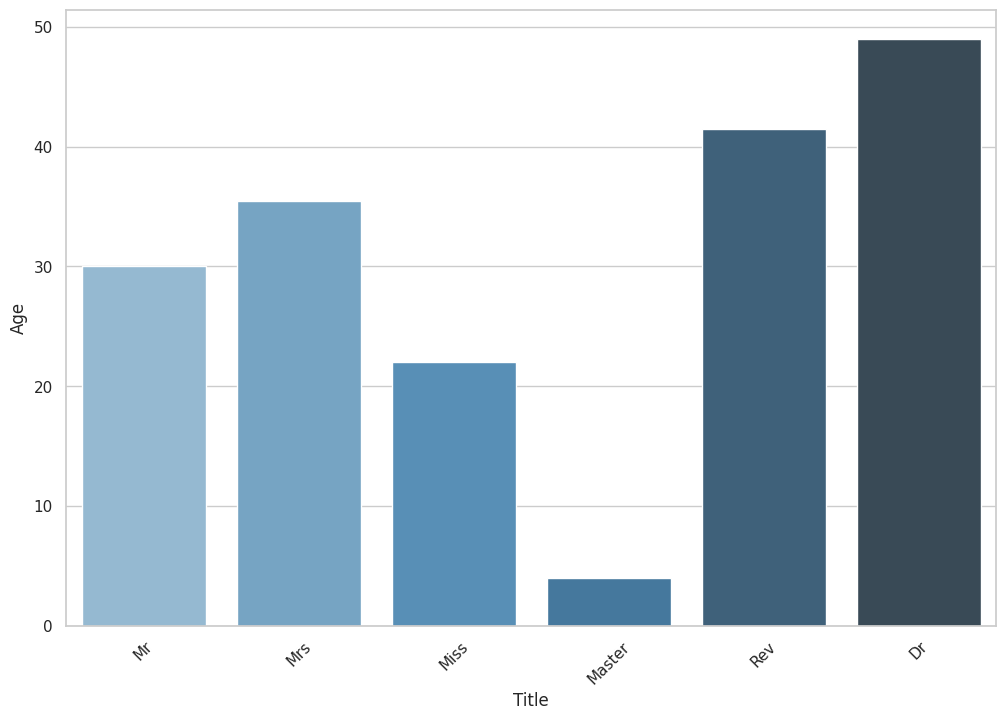

In [ ]:
sns.barplot(x='Title', y='Age', data=df, estimator=np.median, ci=None, palette='Blues_d')
plt.xticks(rotation=45)
plt.show()

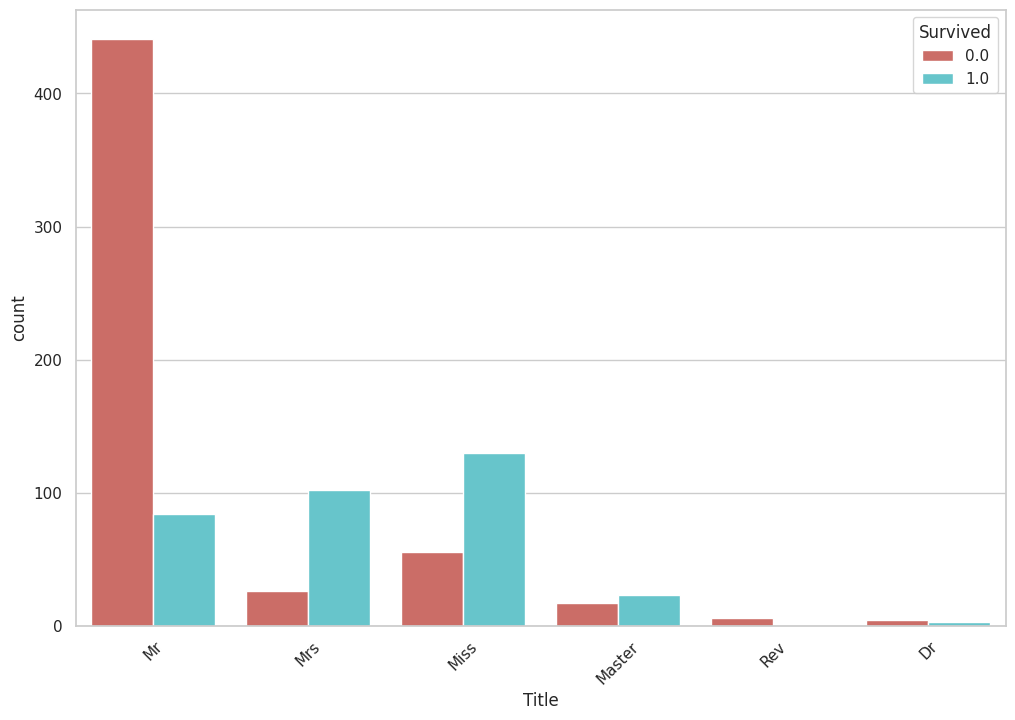

In [ ]:
sns.countplot(x='Title', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 32.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 46.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


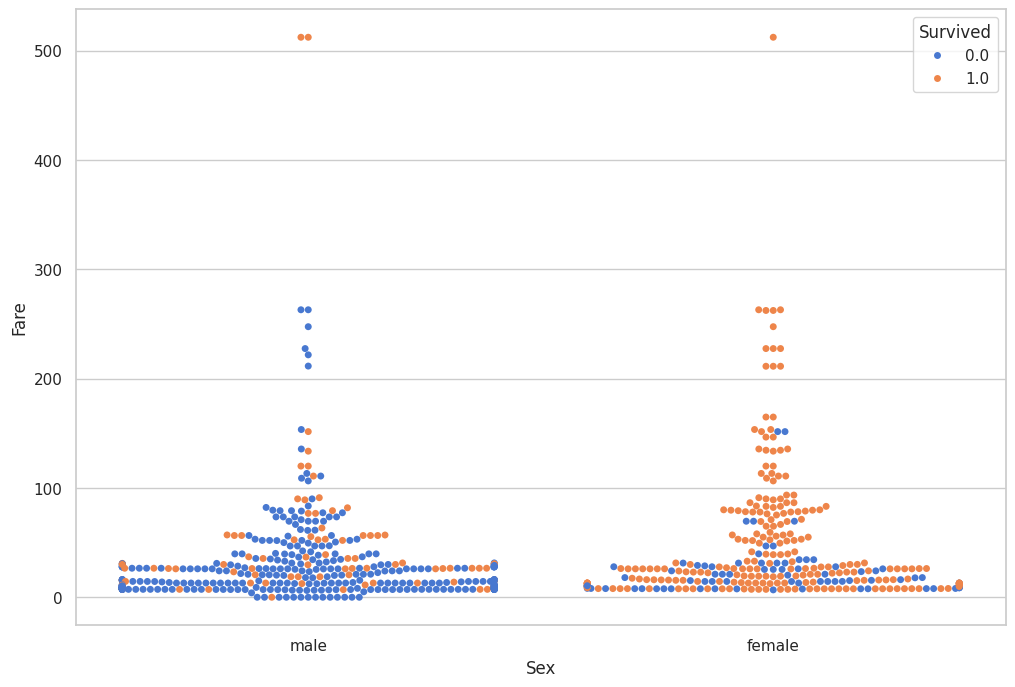

In [ ]:
sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=df)
plt.show()

In [ ]:
# impute missing Fare values using median of Pclass groups
class_fares = dict(df.groupby('Pclass')['Fare'].median())

# create a column of the average fares
df['fare_med'] = df['Pclass'].apply(lambda x: class_fares[x])

# replace all missing fares with the value in this column
df['Fare'].fillna(df['fare_med'], inplace=True, )
del df['fare_med']

<ipython-input-19-064573f5a383>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Embarked', y='Survived', data=df,
<ipython-input-19-064573f5a383>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Embarked', y='Survived', data=df,


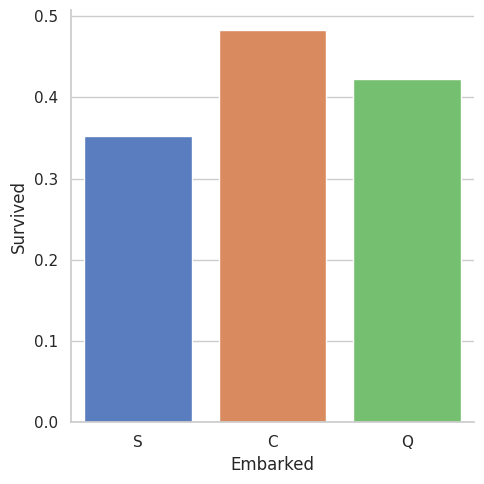

In [ ]:
sns.catplot(x='Embarked', y='Survived', data=df,
            kind='bar', palette='muted', ci=None)
plt.show()

In [ ]:
df['Embarked'].fillna(method='backfill', inplace=True)

In [ ]:
 #create Family_Size column (Parch +)
df['Family_Size'] = df['Parch'] + df['SibSp']

In [ ]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309.0,NaN,NaN,NaN,29.562391,13.16536,0.17,22.0,30.0,35.5,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1309,3,S,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,1309.0,NaN,NaN,NaN,0.883881,1.583639,0.0,0.0,0.0,1.0,10.0
Fare,1309.0,NaN,NaN,NaN,33.276193,51.743584,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#We need to convert all categorical variables into numeric format. The categorical variables we will be keeping are Embarked, Sex and Title.

#The Sex variable can be encoded into single 1-or-0 column, but the other variables will need to be one-hot encoded. Regular label encoding assigns some category labels higher numerical values. This implies some sort of scale (Embarked = 1 is not more than Embarked = 0 - it's just different). One Hot Encoding avoids this problem.

#We will assume that there is some ordinality in the Pclass variable, so we will leave that as a single column.

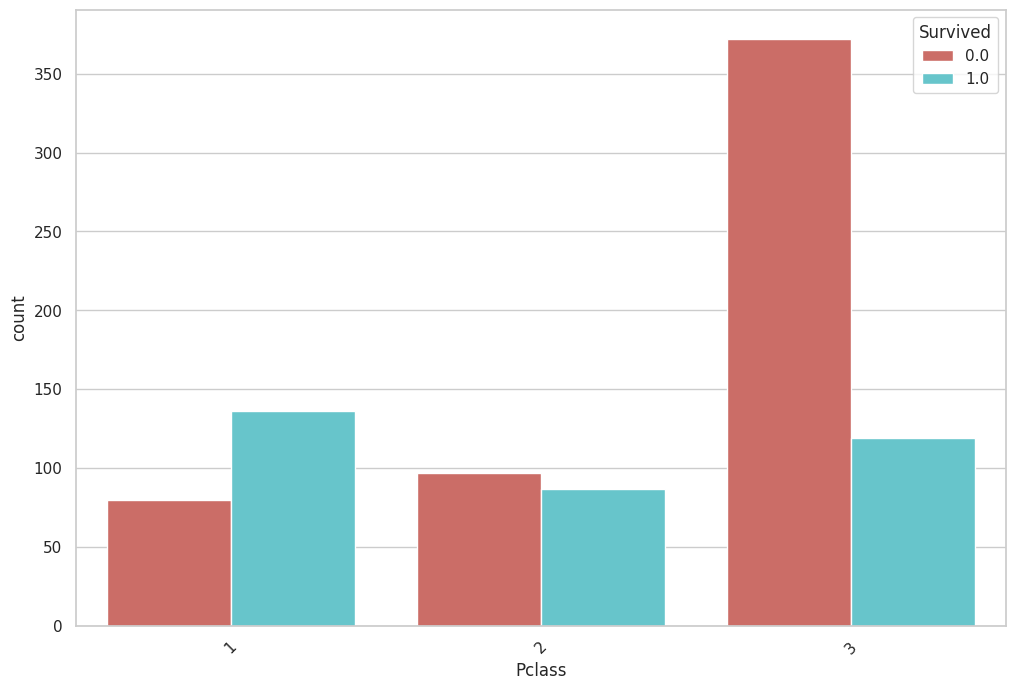

In [ ]:
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

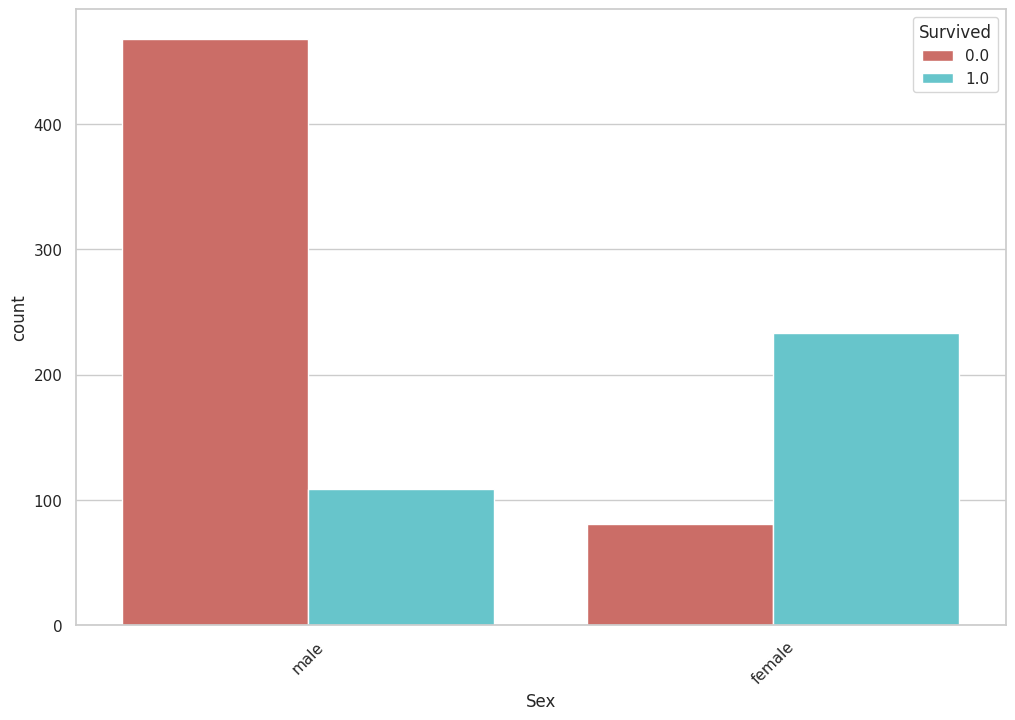

In [ ]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

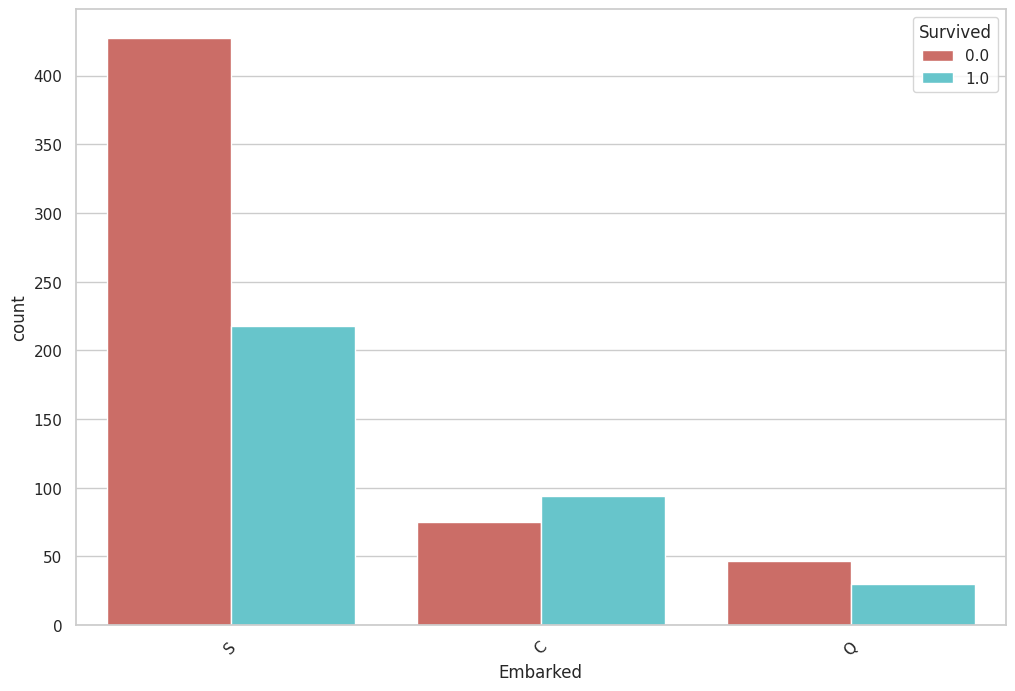

In [ ]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# convert to category dtype
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes

In [ ]:

# List of categorical variables to encode
categorical = ['Embarked', 'Title']

# Convert categorical variables to dummy variables
for var in categorical:
    dummies = pd.get_dummies(df[var], prefix=var).astype(int)
    df = pd.concat([df, dummies], axis=1)
    del df[var]


In [ ]:
# drop the variables we won't be using
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,1,7.2500,0,3,1,1,0.0,0,0,1,0,0,0,1,0,0
1,38.0,1,71.2833,0,1,0,1,1.0,1,0,0,0,0,0,0,1,0
2,26.0,0,7.9250,0,3,0,0,1.0,0,0,1,0,0,1,0,0,0
3,35.0,1,53.1000,0,1,0,1,1.0,0,0,1,0,0,0,0,1,0
4,35.0,0,8.0500,0,3,1,0,0.0,0,0,1,0,0,0,1,0,0


In [ ]:
#But first, we need to separate data_df back into train and test sets.
train = df[pd.notnull(df['Survived'])]
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

In [ ]:
#Since we can't use our test set to assess our model (it doesn't have any labels), we will create a separte 'validation set'. We will use this set to test how our model generalises to unseen data
X_train, X_val, y_train, y_val = train_test_split(
    train.drop(['Survived'], axis=1),
    train['Survived'],
    test_size=0.2, random_state=42)

In [ ]:
for i in [X_train, X_val, X_test]:
    print(i.shape)

(712, 16)
(179, 16)
(418, 16)


In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
accuracy_score(y_val, rf.predict(X_val))

0.8379888268156425

In [ ]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [ ]:
#Cross-validation allows us to train our model on all of the data, while still assessing its performance on unseen data.

In [ ]:
X_train.shape

(891, 16)

In [ ]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
cross_val_score(rf, X_train, y_train, cv=5)

array([0.77653631, 0.85393258, 0.79213483, 0.83146067, 0.78651685])

In [ ]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8081162513338773

In [ ]:
# create the grid
n_estimators = [10, 100, 1000, 2000]
max_depth = [None, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [ ]:
# create the default model
rf = RandomForestClassifier(random_state=42)

# search the grid
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [ ]:
grid_result.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=2000, random_state=42)

In [ ]:
grid_result.best_score_

0.8338945005611672

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833895 using {'max_depth': 5, 'n_estimators': 2000}
0.786756 (0.023056) with: {'max_depth': None, 'n_estimators': 10}
0.801347 (0.018027) with: {'max_depth': None, 'n_estimators': 100}
0.806958 (0.015141) with: {'max_depth': None, 'n_estimators': 1000}
0.806958 (0.013837) with: {'max_depth': None, 'n_estimators': 2000}
0.827160 (0.023381) with: {'max_depth': 5, 'n_estimators': 10}
0.832772 (0.016571) with: {'max_depth': 5, 'n_estimators': 100}
0.832772 (0.016571) with: {'max_depth': 5, 'n_estimators': 1000}
0.833895 (0.017887) with: {'max_depth': 5, 'n_estimators': 2000}
0.821549 (0.016722) with: {'max_depth': 10, 'n_estimators': 10}
0.818182 (0.014547) with: {'max_depth': 10, 'n_estimators': 100}
0.818182 (0.021472) with: {'max_depth': 10, 'n_estimators': 1000}
0.814815 (0.021472) with: {'max_depth': 10, 'n_estimators': 2000}
0.786756 (0.023381) with: {'max_depth': 20, 'n_estimators': 10}
0.801347 (0.019244) with: {'max_depth': 20, 'n_estimators': 100}
0.806958 (0.015141) with

In [ ]:
# create the grid
leaf_samples = [1, 2, 3, 4, 5, 6]
param_grid = dict(min_samples_leaf=leaf_samples)

# create the model with new max_depth and n_estimators
rf = grid_result.best_estimator_

# search the grid
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833895 using {'min_samples_leaf': 1}
0.833895 (0.017887) with: {'min_samples_leaf': 1}
0.832772 (0.019309) with: {'min_samples_leaf': 2}
0.832772 (0.019309) with: {'min_samples_leaf': 3}
0.831650 (0.018027) with: {'min_samples_leaf': 4}
0.831650 (0.018027) with: {'min_samples_leaf': 5}
0.832772 (0.019309) with: {'min_samples_leaf': 6}


In [ ]:
# create the grid
max_features = [5, 8, 10, 12, None]
bootstrap = [True, False]
param_grid = dict(max_features=max_features, bootstrap=bootstrap)

# create the model with new leaf size
rf = grid_result.best_estimator_

# search the grid
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832772 using {'bootstrap': True, 'max_features': 5}
0.832772 (0.019309) with: {'bootstrap': True, 'max_features': 5}
0.830527 (0.013837) with: {'bootstrap': True, 'max_features': 8}
0.829405 (0.016571) with: {'bootstrap': True, 'max_features': 10}
0.829405 (0.019309) with: {'bootstrap': True, 'max_features': 12}
0.829405 (0.019504) with: {'bootstrap': True, 'max_features': None}
0.831650 (0.020756) with: {'bootstrap': False, 'max_features': 5}
0.829405 (0.017887) with: {'bootstrap': False, 'max_features': 8}
0.824916 (0.020756) with: {'bootstrap': False, 'max_features': 10}
0.823793 (0.019504) with: {'bootstrap': False, 'max_features': 12}
0.818182 (0.023489) with: {'bootstrap': False, 'max_features': None}


In [ ]:
rf = grid_result.best_estimator_

In [ ]:
# test our CV score
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8327851358985626

In [ ]:
test['Survived'] = rf.predict(X_test)

In [ ]:
solution = test[['PassengerId', 'Survived']]
solution['Survived'] = solution['Survived'].apply(int)

<ipython-input-54-045cc2177bcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solution['Survived'] = solution['Survived'].apply(int)


In [ ]:
solution.head(1000)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
solution.to_csv("Random_Forest_Solution.csv", index=False)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from numpy.random import seed

In [ ]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [ ]:
display_all(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
Age,1309.0,7.327981e-17,1.000382,-2.233408,-0.574635,0.033252,0.451175,3.832549
Family_Size,1309.0,1.628440e-17,1.000382,-0.558346,-0.558346,-0.558346,0.073352,5.758637
Fare,1309.0,2.171254e-17,1.000382,-0.643344,-0.490691,-0.363894,-0.038690,9.261749
Parch,1309.0,1.730218e-17,1.000382,-0.445000,-0.445000,-0.445000,-0.445000,9.956864
Pclass,1309.0,-2.062691e-16,1.000382,-1.546098,-0.352091,0.841916,0.841916,0.841916
Sex,1309.0,6.440031e-01,0.478997,0.000000,0.000000,1.000000,1.000000,1.000000
SibSp,1309.0,-1.628440e-17,1.000382,-0.479087,-0.479087,-0.479087,0.481288,7.203909
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Embarked_C,1309.0,2.070283e-01,0.405331,0.000000,0.000000,0.000000,0.000000,1.000000
Embarked_Q,1309.0,9.396486e-02,0.291891,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

Epoch 1/100, Train Loss: 0.6691, Validation Accuracy: 0.5642, Validation Loss: 0.6648
Epoch 2/100, Train Loss: 0.6406, Validation Accuracy: 0.5922, Validation Loss: 0.6381
Epoch 3/100, Train Loss: 0.6059, Validation Accuracy: 0.6257, Validation Loss: 0.5940
Epoch 4/100, Train Loss: 0.5550, Validation Accuracy: 0.7207, Validation Loss: 0.5353
Epoch 5/100, Train Loss: 0.5124, Validation Accuracy: 0.8156, Validation Loss: 0.4767
Epoch 6/100, Train Loss: 0.4718, Validation Accuracy: 0.8492, Validation Loss: 0.4283
Epoch 7/100, Train Loss: 0.4487, Validation Accuracy: 0.8659, Validation Loss: 0.3958
Epoch 8/100, Train Loss: 0.4609, Validation Accuracy: 0.8715, Validation Loss: 0.3778
Epoch 9/100, Train Loss: 0.4332, Validation Accuracy: 0.8715, Validation Loss: 0.3745
Epoch 10/100, Train Loss: 0.4291, Validation Accuracy: 0.8771, Validation Loss: 0.3620
Epoch 11/100, Train Loss: 0.4316, Validation Accuracy: 0.8771, Validation Loss: 0.3580
Epoch 12/100, Train Loss: 0.4075, Validation Accurac

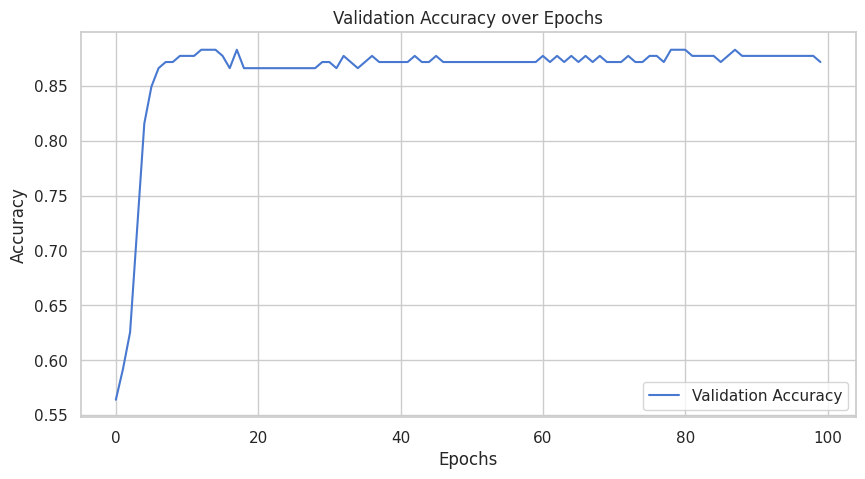

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import matplotlib.pyplot as plt

# Define the model class
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Example data (replace this with your actual data)
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']

# Convert to NumPy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Convert to tensors
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).reshape(-1, 1)

# Create dataset and dataloaders
dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Initialize model, loss function, and optimizer
model = MyModel()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with validation
num_epochs = 100
history = {'train_loss': [], 'val_loss': [], 'val_accuracy': []}

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    history['train_loss'].append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for X_val, y_val in val_loader:
            y_pred = model(X_val)
            val_loss += criterion(y_pred, y_val).item()
            predicted = (y_pred > 0.5).float()
            total += y_val.size(0)
            correct += (predicted == y_val).sum().item()

    val_loss /= len(val_loader)
    val_acc = correct / total
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}')

# Plotting the accuracy
plt.figure(figsize=(10, 5))
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Define the PyTorch model
class MyModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MyModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Define a wrapper class to use PyTorch model with scikit-learn
class PyTorchClassifier(BaseEstimator):
    def __init__(self, input_size=16, hidden_size=64, batch_size=32, epochs=10, lr=0.001):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.batch_size = batch_size
        self.epochs = epochs
        self.lr = lr

    def fit(self, X, y):
        X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        y = y.to_numpy() if isinstance(y, pd.Series) else y

        X_train_tensor = torch.tensor(X, dtype=torch.float32)
        y_train_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
        dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.model = MyModel(self.input_size, self.hidden_size)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            self.model.train()
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                y_pred = self.model(X_batch)
                loss = criterion(y_pred, y_batch)
                loss.backward()
                optimizer.step()

    def score(self, X, y):
        X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        y = y.to_numpy() if isinstance(y, pd.Series) else y

        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
        dataset = TensorDataset(X_tensor, y_tensor)
        val_loader = DataLoader(dataset, batch_size=self.batch_size)

        correct = 0
        total = 0
        with torch.no_grad():
            for X_val, y_val in val_loader:
                y_pred = self.model(X_val)
                predicted = (y_pred > 0.5).float()
                total += y_val.size(0)
                correct += (predicted == y_val).sum().item()

        return correct / total

# Define parameter grid for grid search
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30]
}

# Create PyTorch classifier
classifier = PyTorchClassifier(input_size=16, hidden_size=64)

# Perform grid search
grid_search = GridSearchCV(classifier, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Best parameters found:  {'batch_size': 16, 'epochs': 20}
Best accuracy found:  0.8294051627384961


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator

# Define the PyTorch model
class MyModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MyModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Define a wrapper class to use PyTorch model with scikit-learn
class PyTorchClassifier(BaseEstimator):
    def __init__(self, input_size=16, hidden_size=32, batch_size=32, epochs=10, lr=0.001):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.batch_size = batch_size
        self.epochs = epochs
        self.lr = lr

    def fit(self, X, y):
        X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        y = y.to_numpy() if isinstance(y, pd.Series) else y

        X_train_tensor = torch.tensor(X, dtype=torch.float32)
        y_train_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
        dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.model = MyModel(self.input_size, self.hidden_size)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            self.model.train()
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                y_pred = self.model(X_batch)
                loss = criterion(y_pred, y_batch)
                loss.backward()
                optimizer.step()

    def score(self, X, y):
        X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        y = y.to_numpy() if isinstance(y, pd.Series) else y

        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
        dataset = TensorDataset(X_tensor, y_tensor)
        val_loader = DataLoader(dataset, batch_size=self.batch_size)

        correct = 0
        total = 0
        with torch.no_grad():
            for X_val, y_val in val_loader:
                y_pred = self.model(X_val)
                predicted = (y_pred > 0.5).float()
                total += y_val.size(0)
                correct += (predicted == y_val).sum().item()

        return correct / total

# Define parameter grid for grid search
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30]
}

# Create PyTorch classifier
classifier = PyTorchClassifier(input_size=16, hidden_size=32)

# Example data (replace this with your actual data)
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

# Perform grid search
grid_search = GridSearchCV(classifier, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Use the best model to make predictions on test data
best_model = grid_search.best_estimator_

# Prepare the test data
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)

# Make predictions
best_model.model.eval()
with torch.no_grad():
    test_preds = best_model.model(X_test_tensor)
    test_preds = (test_preds > 0.5).float().numpy().flatten()

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'Survived': test_preds.astype(int)
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission saved to submission.csv")


Best parameters found:  {'batch_size': 32, 'epochs': 30}
Best accuracy found:  0.8271604938271605
Submission saved to submission.csv
